<img src="Resources/small_GA_logo.png" style="float: left; margin: 20px">

#  Book Reviews Capstone Project: Modelling and Analysis


*Delphine Defforey*

___

<font color=navy>
    The main approach used here to analyse topics in book reviews is Latent Dirichlet Allocation (LDA). LDA is a generative probabilistic model that allows one to estimate probability distributions for topics in documents and words. I chose this model because it overcomes limitations of previous methods such as TF-IDF, LSI and probabilistic LSI and is capable of capturing significant intra-document statistical structure.<br><br> Following text pre-processing (using stopwords, tokenisation, lemmatisation), I built 10 different LDA models with differing configurations: varying numbers of topics, passes, excluding short reviews, and different numbers of n-grams (uni-, bi- and trigrams).  I assessed model performance by visually inspecting the topics generated (whether they were sensible, and the degree of overlap), and by comparing perplexity and c_v coherence scores. Perplexity here is used as a figure of merit for comparing models, with lower perplexity scores indicating better generalisation performance. Topic coherence is essentially a measure of the quality of the learned topics. Comments about model performance are interspersed throughout the notebook.<br><br>
    In addition to topic modelling, I also used VADER (Valence Aware Dictionary and sEntiment Reasoner) to assess the polarity of book reviews and found that, on average, they tend to be slightly negative (vader compound score of 0.42).<br><br>
    The key findings of this modelling exercise using the fifth model (LDA model #5, which performed best) are that themes common to some book genres (magic, love, storylines & plots) do come across as topics in the topic model, indicating that it may be worth developing distinct marketing strategies for  fantasy, romance, thriller books in particular. Another finding is that target audiences also come up as topics, in particular children and young adult, indicating that books for this demographic-range should be promoted in a way that targets this specific audience. An important potential limitation to bear in mind when interpreting these findings is that topics were manually labelled, and that there may be some bias imparted by the person labelling them.
    </font>

<h3>Notebook Guide</h3><br>
<div class="toc"><ul class="toc-item">
    <li><span><a href="#Imports-and-Settings" data-toc-modified-id="Introduction-and-Settings">Imports and Settings</a></span></li>
    <li><span><a href="#Configs">Configs</a></span></li>
    <li><span><a href="#Data-Preprocessing" data-toc-modified-id="Data-Preprocessing">Data Preprocessing</a></span></li>
        <ul><li><span><a href="#Unigrams">Unigrams</a></span></li>
            <li><span><a href="#Bigrams-and-Trigrams" data-toc-modified-id="Bigrams-and-Trigrams">Bigrams and Trigrams</a></span></li></ul>
    <li><span><a href="#Sentiment-Analysis-(Polarity)" data-toc-modified-id="Sentiment-Analysis-(Polarity)">Sentiment Analysis (Polarity)</a></span></li>
    <li><span><a href="#LDA-Model-Comparisons" data-toc-modified-id="LDA-Model-Comparisons">LDA Model Comparisons</a></span></li>
    <ul><li><span><a href="#LDA-model-#1:-unigrams,-20-topics,-5-passes,-no-length-restriction-on-reviews" data-toc-modified-id="LDA-model-#1:-unigrams,-20-topics,-5-passes,-no-length-restriction-on-reviews">LDA model #1</a></span></li>
        <li><span><a href="#LDA-model-#2:-unigrams,-20-topics,-10-passes,-no-length-restriction-on-reviews" data-toc-modified-id="LDA-model-#2:-unigrams,-20-topics,-10-passes,-no-length-restriction-on-reviews">LDA model #2</a></span></li>
        <li><span><a href="#LDA-model-#3:-unigrams,-20-topics,-5-passes,-processed-reviews-containing-at-least-5-words" data-toc-modified-id="LDA-model-#3:-unigrams,-20-topics,-5-passes,-processed-reviews-containing-at-least-5-words" data-toc-modified-id="LDA-model-#3:-unigrams,-20-topics,-5-passes,-processed-reviews-containing-at-least-5-words">LDA model #3</a></span></li>
        <li><span><a href="#LDA-model-#4:-unigrams,-20-topics,-20-passes,-no-length-restriction-on-reviews" data-toc-modified-id="LDA-model-#4:-unigrams,-20-topics,-20-passes,-no-length-restriction-on-reviews">LDA model #4</a></span></li>
        <li><span><a href="#LDA-model-#5:-bigrams,-20-topics,-10-passes,-no-length-restriction-on-reviews" data-toc-modified-id="LDA-model-#5:-bigrams,-20-topics,-10-passes,-no-length-restriction-on-reviews">LDA model #5</a></span></li>
        <li><span><a href="#LDA-model-#6:-trigrams,-20-topics,-10-passes,-no-length-restriction-on-reviews" data-toc-modified-id="LDA-model-#6:-trigrams,-20-topics,-10-passes,-no-length-restriction-on-reviews">LDA model #6</a></span></li>
        <li><span><a href="#LDA-model-#7:-trigrams,-15-topics,-10-passes,-no-length-restriction-on-reviews" data-toc-modified-id="LDA-model-#7:-trigrams,-15-topics,-10-passes,-no-length-restriction-on-reviews">LDA model #7</a></span></li>
        <li><span><a href="#LDA-model-#8:-trigrams,-10-topics,-10-passes,-no-length-restriction-on-reviews" data-toc-modified-id="LDA-model-#8:-trigrams,-10-topics,-10-passes,-no-length-restriction-on-reviews">LDA model #8</a></span></li>
        <li><span><a href="#LDA-model-#9:-trigrams,-30-topics,-10-passes,-no-length-restriction-on-reviews" data-toc-modified-id="LDA-model-#9:-trigrams,-30-topics,-10-passes,-no-length-restriction-on-reviews">LDA model #9</a></span></li>
        <li><span><a href="#LDA-model-#10:-trigrams,-20-topics,-10-passes,-processed-reviews-containing-at-least-5-words" data-toc-modified-id="LDA-model-#10:-trigrams,-20-topics,-10-passes,-processed-reviews-containing-at-least-5-words">LDA model #10</a></span></li></ul>
    <li><span><a href="#Topic Predictions">Topic Predictions</a></span></li>
    <ul><li><span><a href="#Using-a-trained-LDA-model-(model-#5)-to-predict-topics-from-book-reviews" data-toc-modified-id="Using-a-trained-LDA-model-(model-#5)-to-predict-topics-from-book-reviews">Using a trained LDA model (model #5) to predict topics from book reviews</a></span></li>
        <li><span><a href="#Interpretation-of-model-predictions" data-toc-modified-id="Interpretation-of-model-predictions">Interpretation of model predictions</a></span></li></ul>
</ul></div>



### Imports and Settings

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk import FreqDist
from nltk.corpus import stopwords
import textacy
import spacy

import gensim
from gensim import corpora
from gensim.models import CoherenceModel
import pyLDAvis   
import pyLDAvis.gensim

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer # https://github.com/cjhutto/vaderSentiment
from sklearn.feature_extraction import DictVectorizer

In [2]:
nltk.download('stopwords')
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
pd.set_option('display.max_columns', 20)

### Configs

In [3]:
final_clean_dataset_path = '/Users/ddefforey1/work/capstone_datasets/final_clean_data.csv'
processed_reviews_path = '/Users/ddefforey1/work/capstone_datasets/processed_reviews.csv'

### Data Preprocessing

#### Unigrams

In [4]:
# loading the combined, finalised dataset
book_reviews = pd.read_csv(final_clean_dataset_path, dtype=object)

In [5]:
book_reviews.head()

,reviews,n_helpful,time,user,id,book_title,author,isbn_x,book_genres,language
0,This a great book for young readers to be intr...,0,"Nov 7, 2007",van_stef,3206242,The Hobbit (1937),J. R. R. Tolkien,0618260307,fantasy,en
1,Not as great a literary work as Tolkien's famo...,1,"Aug 10, 2007",EvilPlatypus,3206242,The Hobbit (1937),J. R. R. Tolkien,0618260307,fantasy,en
2,Bilbo Baggins becomes an accidental hero in th...,0,"Dec 3, 2012",ewyatt,3206242,The Hobbit (1937),J. R. R. Tolkien,0618260307,fantasy,en
3,I found the Hobbit when I was in the 5th grade...,0,"May 11, 2007",Nikkles,3206242,The Hobbit (1937),J. R. R. Tolkien,0618260307,fantasy,en
4,It's hard to know what to say about Tolkien --...,0,"Apr 3, 2013",auntieknickers,3206242,The Hobbit (1937),J. R. R. Tolkien,0618260307,fantasy,en


In [6]:
# renaming the isbn column
book_reviews.rename(columns={'reviews': 'reviews', 'n_helpful': 'n_helpful', 'time': 'time', 'user': 'user', 'id': 'id', 
                             'book_title': 'book_title', 'author': 'author', 'isbn_x': 'isbn', 'book_genres': 'book_genres', 
                             'language': 'language'}, inplace=True)

In [7]:
nlp = spacy.load('en', disable=['parser', 'ner'])
stop_words = stopwords.words('english')

In [8]:
# here I'm adding more stopwords to better differentiate topics 
# I'm assuming that these words aren't important for my topic models
more_stopwords = ['http', 'www', 'com', 'html', 'amp', 'book', 'bit', 'little', 'lot', 'thing', 'something', 'way', 
                  'many', 'much', 'page', 'reader', 'first']
stop_words.extend(more_stopwords)

In [9]:
def remove_stopwords(rev):
    rev_new = " ".join([i for i in rev if i not in stop_words])
    return rev_new

In [10]:
def lemmatize_text(texts, tags=['NOUN', 'ADJ']):
    output = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        output.append([token.lemma_ for token in doc if token.pos_ in tags])
    return output

In [11]:
# replace "n't" with " not", remove unwanted characters, numbers and symbols
book_reviews['processed_reviews'] = book_reviews['reviews'].str.replace("n\'t", " not").str.replace("[^a-zA-Z#]", " ")

In [12]:
# remove short words (length < 3)
book_reviews['processed_reviews'] = book_reviews['processed_reviews'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

# remove stopwords from the text
reviews = [remove_stopwords(r.split()) for r in book_reviews['processed_reviews']]

# make entire text lowercase
reviews = [r.lower() for r in reviews]

In [13]:
tokenized_reviews = pd.Series(reviews).apply(lambda x: x.split())

In [14]:
lemma_reviews = lemmatize_text(tokenized_reviews)

In [15]:
clean_reviews = []
for i in range(len(lemma_reviews)):
    clean_reviews.append(' '.join(lemma_reviews[i]))
    
book_reviews['processed_reviews'] = clean_reviews

In [16]:
book_reviews['tokenized_reviews'] = tokenized_reviews
book_reviews['lemmatized_reviews'] = lemma_reviews

In [17]:
book_reviews.head()

,reviews,n_helpful,time,user,id,book_title,author,isbn,book_genres,language,processed_reviews,tokenized_reviews,lemmatized_reviews
0,This a great book for young readers to be intr...,0,"Nov 7, 2007",van_stef,3206242,The Hobbit (1937),J. R. R. Tolkien,0618260307,fantasy,en,great young reader world middle earth,"[this, great, young, readers, introduced, worl...","[great, young, reader, world, middle, earth]"
1,Not as great a literary work as Tolkien's famo...,1,"Aug 10, 2007",EvilPlatypus,3206242,The Hobbit (1937),J. R. R. Tolkien,0618260307,fantasy,en,great literary work famous lord ring adult aut...,"[not, great, literary, work, tolkien, famous, ...","[great, literary, work, famous, lord, ring, ad..."
2,Bilbo Baggins becomes an accidental hero in th...,0,"Dec 3, 2012",ewyatt,3206242,The Hobbit (1937),J. R. R. Tolkien,0618260307,fantasy,en,bilbo baggin accidental hero classic high fant...,"[bilbo, baggins, becomes, accidental, hero, cl...","[bilbo, baggin, accidental, hero, classic, hig..."
3,I found the Hobbit when I was in the 5th grade...,0,"May 11, 2007",Nikkles,3206242,The Hobbit (1937),J. R. R. Tolkien,0618260307,fantasy,en,hobbit grade jule verne book interesting read ...,"[found, hobbit, grade, finished, reading, jule...","[hobbit, grade, jule, verne, book, interesting..."
4,It's hard to know what to say about Tolkien --...,0,"Apr 3, 2013",auntieknickers,3206242,The Hobbit (1937),J. R. R. Tolkien,0618260307,fantasy,en,hard know love suspect people hot potato page ...,"[hard, know, say, tolkien, either, love, hate,...","[hard, know, love, suspect, people, hot, potat..."


In [18]:
# check what a processed review looks like
book_reviews.processed_reviews[8]

'classic awesome read'

In [19]:
# determine the length of processed reviews
# this will help remove shorter reviews later on
book_reviews['word_counts'] = book_reviews['processed_reviews'].str.count(' ') + 1

#### Bigrams and Trigrams

In [20]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(tokenized_reviews, min_count=5, threshold=100) # higher threshold fewer phrases
trigram = gensim.models.Phrases(bigram[tokenized_reviews], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)


In [21]:
reviews[3610]

'after reading neverwhere foray science fiction genre proudly count among large growing group gaiman fans although shorter would liked neverwhere full surprises kept guessing intrigued great weekend read trip north wait read gaiman works'

In [22]:
# verifying that the bigram model works
print(bigram_mod[tokenized_reviews[3610]])

['after', 'reading', 'neverwhere', 'foray', 'science_fiction', 'genre', 'proudly', 'count', 'among', 'large', 'growing', 'group', 'gaiman', 'fans', 'although', 'shorter', 'would', 'liked', 'neverwhere', 'full', 'surprises', 'kept_guessing', 'intrigued', 'great', 'weekend', 'read', 'trip', 'north', 'wait', 'read', 'gaiman', 'works']


In [23]:
# verifying that the trigram model behaves as expected
print(trigram_mod[bigram_mod[tokenized_reviews[3610]]])

['after', 'reading', 'neverwhere', 'foray', 'science_fiction', 'genre', 'proudly', 'count', 'among', 'large', 'growing', 'group', 'gaiman', 'fans', 'although', 'shorter', 'would', 'liked', 'neverwhere', 'full', 'surprises', 'kept_guessing', 'intrigued', 'great', 'weekend', 'read', 'trip', 'north', 'wait', 'read', 'gaiman', 'works']


In [24]:
def make_bigrams(reviews):
    return [bigram_mod[word] for word in reviews]

def make_trigrams(reviews):
    return [trigram_mod[bigram_mod[word]] for word in reviews]

In [25]:
# form bigrams
review_bigrams = make_bigrams(tokenized_reviews)

# form trigrams
review_trigrams = make_trigrams(tokenized_reviews)

In [26]:
# lemmatize bigrams and trigrams
lemma_reviews_bigrams = lemmatize_text(review_bigrams)
lemma_reviews_trigrams = lemmatize_text(review_trigrams)

In [27]:
# create a separate dataframe for trigrams so that reviews can be filtered by length
# these will be used in LDA model 10
book_reviews_trigrams = pd.read_csv(final_clean_dataset_path, dtype=object)

In [28]:
book_reviews_trigrams['processed_reviews'] = book_reviews['processed_reviews']
book_reviews_trigrams['tokenized_reviews'] = tokenized_reviews
book_reviews_trigrams['lemmatized_reviews_trigrams'] = lemma_reviews_trigrams

In [29]:
book_reviews_trigrams['word_counts'] = book_reviews['processed_reviews'].str.count(' ') + 1

In [30]:
book_reviews_trigrams.head(2)

,reviews,n_helpful,time,user,id,book_title,author,isbn_x,book_genres,language,processed_reviews,tokenized_reviews,lemmatized_reviews_trigrams,word_counts
0,This a great book for young readers to be intr...,0,"Nov 7, 2007",van_stef,3206242,The Hobbit (1937),J. R. R. Tolkien,0618260307,fantasy,en,great young reader world middle earth,"[this, great, young, readers, introduced, worl...","[great, young, reader, world, middle, earth]",6
1,Not as great a literary work as Tolkien's famo...,1,"Aug 10, 2007",EvilPlatypus,3206242,The Hobbit (1937),J. R. R. Tolkien,0618260307,fantasy,en,great literary work famous lord ring adult aut...,"[not, great, literary, work, tolkien, famous, ...","[great, literary, work, famous, lord_ring, adu...",32


### Sentiment Analysis (Polarity)

<font color=navy>
    An important limitation of VADER (Valence Aware Dictionary and sEntiment Reasoner) to bear in mind is that it is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media. Here, I am using it on book reviews and I'm making the assumption that book reviews on a social platform like LibraryThing are similar to the kinds of text this tool was developed and trained on.
    </font>

In [31]:
vader = SentimentIntensityAnalyzer()

In [32]:
# testing on a couple of reviews
analyzer = SentimentIntensityAnalyzer()
for sentence in book_reviews.processed_reviews.values[0:2]:
    vs = analyzer.polarity_scores(sentence)
    print(sentence)
    print(vs)

great young reader world middle earth
{'neg': 0.0, 'neu': 0.549, 'pos': 0.451, 'compound': 0.6249}
great literary work famous lord ring adult author patronizing style time concerned lotr tolkien language long drivel detail want someone jrr tolkien everyone hobbit young audience people age finish third time charm
{'neg': 0.0, 'neu': 0.782, 'pos': 0.218, 'compound': 0.7964}


In [33]:
vader_scores = book_reviews['processed_reviews'].map(analyzer.polarity_scores)

In [34]:
dvec = DictVectorizer()

vader_scores = dvec.fit_transform(vader_scores)
vader_scores

<272599x4 sparse matrix of type '<class 'numpy.float64'>'
	with 944318 stored elements in Compressed Sparse Row format>

In [35]:
dvec.feature_names_

['compound', 'neg', 'neu', 'pos']

In [36]:
for i, col in enumerate(dvec.feature_names_):
    book_reviews['vader_{}'.format(col)] = vader_scores[:, i].toarray().ravel()  

In [37]:
book_reviews.head()

,reviews,n_helpful,time,user,id,book_title,author,isbn,book_genres,language,processed_reviews,tokenized_reviews,lemmatized_reviews,word_counts,vader_compound,vader_neg,vader_neu,vader_pos
0,This a great book for young readers to be intr...,0,"Nov 7, 2007",van_stef,3206242,The Hobbit (1937),J. R. R. Tolkien,0618260307,fantasy,en,great young reader world middle earth,"[this, great, young, readers, introduced, worl...","[great, young, reader, world, middle, earth]",6,0.6249,0.000,0.549,0.451
1,Not as great a literary work as Tolkien's famo...,1,"Aug 10, 2007",EvilPlatypus,3206242,The Hobbit (1937),J. R. R. Tolkien,0618260307,fantasy,en,great literary work famous lord ring adult aut...,"[not, great, literary, work, tolkien, famous, ...","[great, literary, work, famous, lord, ring, ad...",32,0.7964,0.000,0.782,0.218
2,Bilbo Baggins becomes an accidental hero in th...,0,"Dec 3, 2012",ewyatt,3206242,The Hobbit (1937),J. R. R. Tolkien,0618260307,fantasy,en,bilbo baggin accidental hero classic high fant...,"[bilbo, baggins, becomes, accidental, hero, cl...","[bilbo, baggin, accidental, hero, classic, hig...",18,0.5106,0.062,0.766,0.172
3,I found the Hobbit when I was in the 5th grade...,0,"May 11, 2007",Nikkles,3206242,The Hobbit (1937),J. R. R. Tolkien,0618260307,fantasy,en,hobbit grade jule verne book interesting read ...,"[found, hobbit, grade, finished, reading, jule...","[hobbit, grade, jule, verne, book, interesting...",17,0.7845,0.000,0.685,0.315
4,It's hard to know what to say about Tolkien --...,0,"Apr 3, 2013",auntieknickers,3206242,The Hobbit (1937),J. R. R. Tolkien,0618260307,fantasy,en,hard know love suspect people hot potato page ...,"[hard, know, say, tolkien, either, love, hate,...","[hard, know, love, suspect, people, hot, potat...",18,0.3818,0.158,0.658,0.184


1. positive sentiment: compound score >= 0.05
2. neutral sentiment: (compound score > -0.05) and (compound score < 0.05)
3. negative sentiment: compound score <= -0.05

In [38]:
book_reviews.vader_compound.describe()

count    272599.000000
mean          0.417572
std           0.571047
min          -0.999700
25%           0.000000
50%           0.627300
75%           0.883400
max           1.000000
Name: vader_compound, dtype: float64

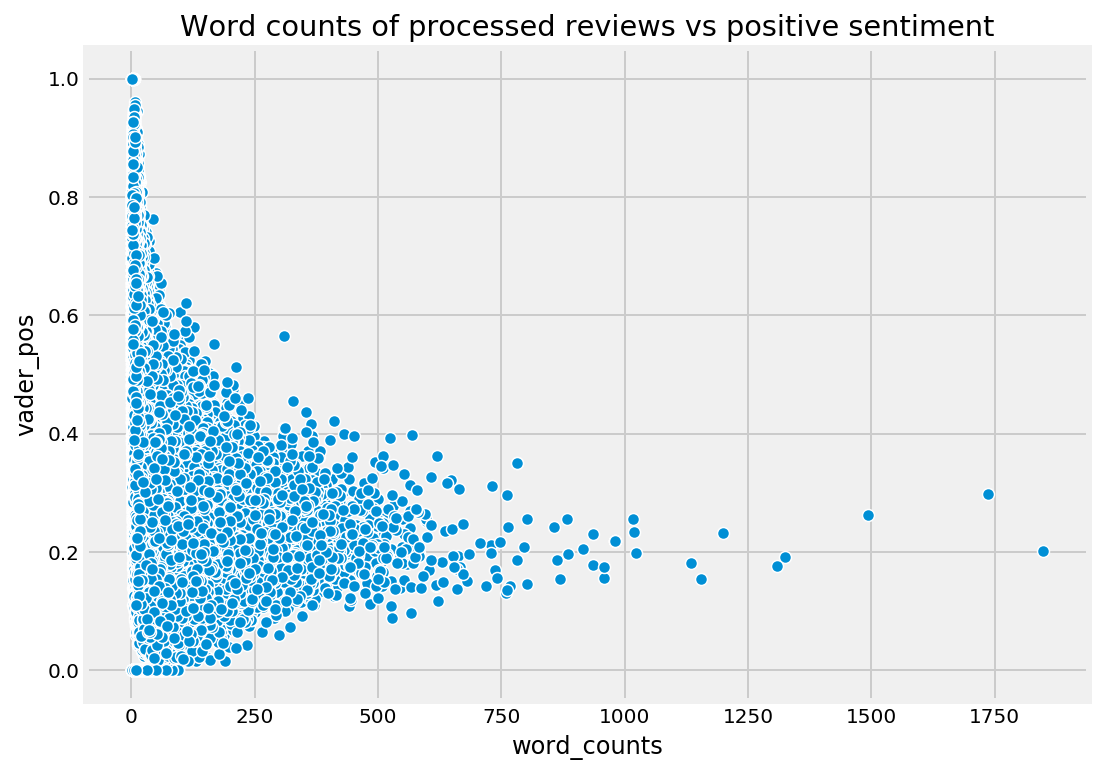

In [39]:
# visualising positive sentiment as a function of word count
fig,ax = plt.subplots(figsize=(8,6))
ax = sns.scatterplot(data = book_reviews[book_reviews.word_counts < 2000], x='word_counts', y='vader_pos')
ax.set(title='Word counts of processed reviews vs positive sentiment');

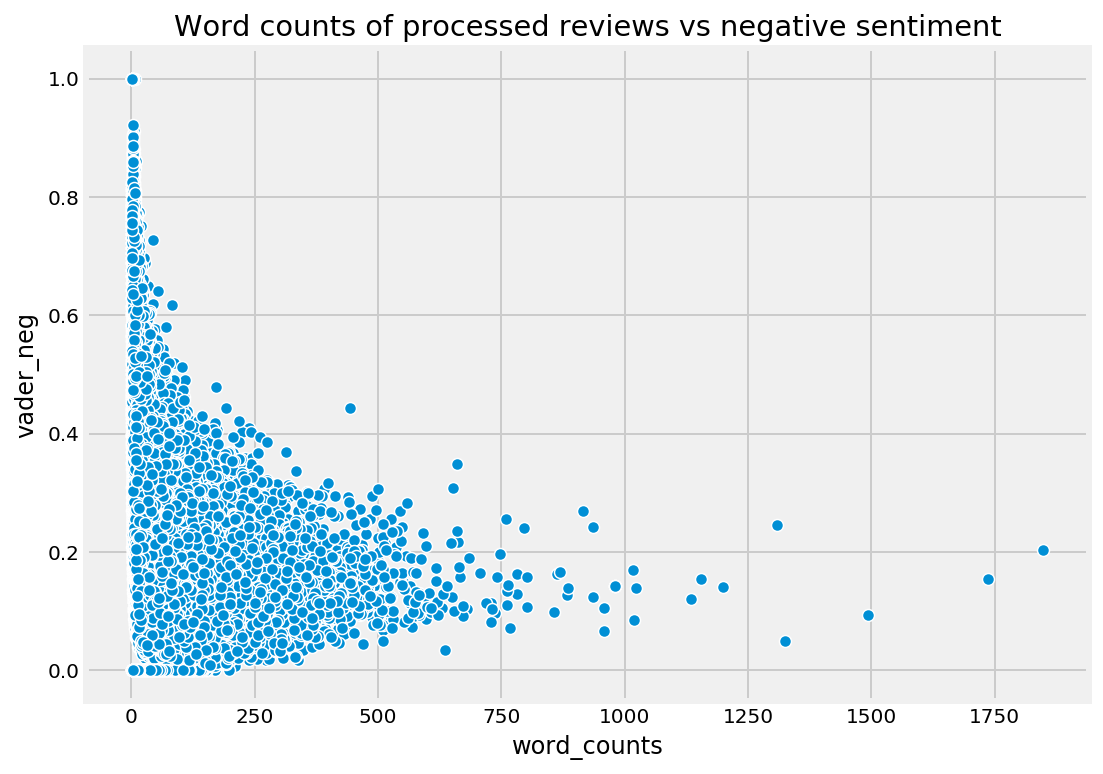

In [40]:
# visualising negative sentiment as a function of word count
fig,ax = plt.subplots(figsize=(8,6))
ax = sns.scatterplot(data = book_reviews[book_reviews.word_counts < 2000], x='word_counts', y='vader_neg')
ax.set(title='Word counts of processed reviews vs negative sentiment');

In [41]:
book_reviews.to_csv(processed_reviews_path, index=False)

<font color=navy>
The relationship between words counts and sentiment is not clear-cut, though it is apparent that longer reviews tend to be more negative. As a whole, book reviews from this dataset tend to be more negative (mean compound vader score of 0.42).
    </font>

### LDA Model Comparisons

<font color=navy>
    Here, I trained and tuned 10 different LDA models to optimise c_v coherence score, perplexity and most importantly human interpretability. Ultimately, I prioritised the latter and found that my fifth model (bigrams, 20 topics, 10 passes, no length restriction on reviews) produced the most interpretable and useful results given the problem I am working on. 
    </font>

#### LDA model #1: unigrams, 20 topics, 5 passes, no length restriction on reviews 

In [42]:
book_reviews = pd.read_csv(processed_reviews_path,  dtype=object)

In [43]:
# Create the term dictionary of our corpus, where every unique term is assigned an index
dictionary = corpora.Dictionary(lemma_reviews)

In [44]:
# Convert list of reviews (lemma_reviews) into a Document Term Matrix using the dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(rev) for rev in lemma_reviews]

In [45]:
# instantiating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

In [46]:
# Build LDA model
# might be worth having multiple passes through the corpus
# first I need to check how long one pass will take
# this is helpful: https://stackoverflow.com/questions/50805556/understanding-parameters-in-gensim-lda-model
lda_model1 = LDA(corpus=doc_term_matrix,
                id2word=dictionary,
                num_topics=20, 
                random_state=1,
                passes=5
               )

In [47]:
lda_model1.print_topics()

[(0,
  '0.036*"novel" + 0.018*"time" + 0.010*"work" + 0.010*"story" + 0.009*"language" + 0.008*"year" + 0.008*"character" + 0.007*"word" + 0.007*"book" + 0.007*"author"'),
 (1,
  '0.034*"house" + 0.033*"new" + 0.020*"day" + 0.018*"york" + 0.018*"room" + 0.015*"alex" + 0.014*"food" + 0.014*"night" + 0.014*"baby" + 0.013*"poetry"'),
 (2,
  '0.090*"child" + 0.081*"story" + 0.043*"great" + 0.040*"young" + 0.028*"kid" + 0.025*"student" + 0.024*"picture" + 0.023*"different" + 0.023*"adult" + 0.022*"illustration"'),
 (3,
  '0.024*"life" + 0.021*"people" + 0.017*"world" + 0.009*"time" + 0.009*"man" + 0.008*"woman" + 0.008*"new" + 0.007*"human" + 0.007*"american" + 0.006*"culture"'),
 (4,
  '0.068*"funny" + 0.058*"fun" + 0.035*"humor" + 0.026*"cat" + 0.023*"poem" + 0.019*"audio" + 0.015*"hilarious" + 0.015*"light" + 0.015*"loud" + 0.014*"humorous"'),
 (5,
  '0.038*"jack" + 0.033*"peter" + 0.029*"george" + 0.028*"david" + 0.024*"ship" + 0.021*"martin" + 0.020*"sea" + 0.020*"photo" + 0.017*"goodr

In [48]:
# saving the trained model
lda_model1.save('lda_model_1')

In [49]:
# to load a pre-trained model
lda_model1 = gensim.models.ldamodel.LdaModel.load('lda_model_1')

In [50]:
# Compute Perplexity
print('\nPerplexity: ', lda_model1.log_perplexity(doc_term_matrix))  # a measure of how good the model is. lower the better.

# Compute Coherence Score (reported betwee 0 and 1)
coherence_model_lda1 = CoherenceModel(model=lda_model1, texts=lemma_reviews, dictionary=dictionary, coherence='c_v')
coherence_lda1 = coherence_model_lda1.get_coherence()
print('\nCoherence Score: ', coherence_lda1)


Perplexity:  -11.916563554277214

Coherence Score:  0.4063372167943746


In [51]:
# creating an interactive visualisation of the LDA model output
pyLDAvis.enable_notebook()
lda_model_vis1 = pyLDAvis.gensim.prepare(lda_model1, doc_term_matrix, dictionary, sort_topics=False)
pyLDAvis.save_html(lda_model_vis1, 'lda_model1.html')

#### [Link to interactive LDA topic visualisation for model #1](./Resources/lda_model1.html)

#### LDA model #2: unigrams, 20 topics, 10 passes, no length restriction on reviews 

In [52]:
# the second model will be essentially the same as the first, but with more passes 
# this is to check how it affects topic coherence and perplexity

In [53]:
#second model with 10 passes through the corpus
lda_model2 = LDA(corpus=doc_term_matrix,
                id2word=dictionary,
                num_topics=20, 
                random_state=1,
                passes=10
               )

In [52]:
lda_model2.print_topics()

[(0,
  '0.154*"series" + 0.061*"book" + 0.039*"first" + 0.020*"new" + 0.018*"next" + 0.017*"second" + 0.015*"harry" + 0.013*"witch" + 0.011*"paul" + 0.010*"previous"'),
 (1,
  '0.058*"family" + 0.037*"mother" + 0.031*"father" + 0.030*"story" + 0.027*"year" + 0.024*"old" + 0.023*"life" + 0.022*"sister" + 0.019*"child" + 0.018*"brother"'),
 (2,
  '0.108*"book" + 0.051*"school" + 0.043*"child" + 0.034*"young" + 0.032*"girl" + 0.029*"student" + 0.028*"kid" + 0.024*"boy" + 0.019*"adult" + 0.017*"great"'),
 (3,
  '0.082*"woman" + 0.039*"man" + 0.031*"life" + 0.024*"love" + 0.023*"novel" + 0.019*"young" + 0.019*"wife" + 0.018*"husband" + 0.014*"henry" + 0.013*"relationship"'),
 (4,
  '0.020*"thing" + 0.016*"good" + 0.012*"bad" + 0.011*"people" + 0.011*"way" + 0.010*"day" + 0.010*"little" + 0.009*"something" + 0.009*"man" + 0.009*"time"'),
 (5,
  '0.080*"funny" + 0.041*"humor" + 0.034*"fun" + 0.032*"island" + 0.027*"adam" + 0.020*"cookie" + 0.020*"uncle" + 0.019*"god" + 0.018*"hilarious" + 0.0

In [54]:
# Compute Perplexity
print('\nPerplexity: ', lda_model2.log_perplexity(doc_term_matrix))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda2 = CoherenceModel(model=lda_model2, texts=lemma_reviews, dictionary=dictionary, coherence='c_v')
coherence_lda2 = coherence_model_lda2.get_coherence()
print('\nCoherence Score: ', coherence_lda2)


Perplexity:  -11.917621749979276

Coherence Score:  0.4070368184330084


<font color=navy>
Increasing the number of corpus passes from 5 to 10 lowered perplexity and increased the coherence score a bit. While the difference is rather small, it is still an improvement and I will continue with 10 passes.
    </font>

In [55]:
# to save the trained model
lda_model2.save('lda_model_2')

In [56]:
pyLDAvis.enable_notebook()
lda_model_vis2 = pyLDAvis.gensim.prepare(lda_model2, doc_term_matrix, dictionary, sort_topics=False)
pyLDAvis.save_html(lda_model_vis2, 'lda_model2.html')

#### [Link to interactive LDA topic visualisation for model #2](./Resources/lda_model2.html)

#### LDA model #3: unigrams, 20 topics, 5 passes, processed reviews containing at least 5 words

In [57]:
# this third model drops reviews that have fewer than 5 words and see how that impacts model performance
# this is to test whether short reviews add noise to the model and impact coherence negatively

In [61]:
book_reviews['word_counts'] = book_reviews['word_counts'].astype(int)

In [62]:
longer_reviews = book_reviews[book_reviews.word_counts >= 5].copy()
longer_reviews.shape

(247868, 18)

In [63]:
longer_reviews['processed_reviews'] = longer_reviews['processed_reviews'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))
reviews = [remove_stopwords(r.split()) for r in longer_reviews['processed_reviews']]
reviews = [r.lower() for r in reviews]

In [64]:
tokenized_longer_reviews = pd.Series(reviews).apply(lambda x: x.split())

In [65]:
lemma_longer_reviews = lemmatize_text(tokenized_longer_reviews)

In [66]:
dictionary_model3 = corpora.Dictionary(lemma_longer_reviews)

In [67]:
doc_term_matrix_model3 = [dictionary_model3.doc2bow(rev) for rev in lemma_longer_reviews]

In [68]:
# third model excludes reviews with fewer than 5 words after preprocessing
lda_model3 = LDA(corpus=doc_term_matrix_model3,
                 id2word=dictionary_model3,
                 num_topics=20, 
                 random_state=1,
                 passes=5
                )

In [69]:
lda_model3.print_topics()

[(0,
  '0.061*"family" + 0.052*"story" + 0.044*"woman" + 0.037*"mother" + 0.037*"life" + 0.031*"father" + 0.022*"sister" + 0.021*"man" + 0.021*"young" + 0.019*"child"'),
 (1,
  '0.023*"michael" + 0.020*"jack" + 0.017*"witch" + 0.015*"demon" + 0.013*"victorian" + 0.011*"lewis" + 0.010*"world" + 0.009*"hilarious" + 0.008*"hunter" + 0.008*"experiment"'),
 (2,
  '0.070*"king" + 0.033*"lord" + 0.025*"queen" + 0.024*"george" + 0.023*"dragon" + 0.021*"monster" + 0.016*"game" + 0.015*"prince" + 0.015*"hero" + 0.015*"spy"'),
 (3,
  '0.087*"good" + 0.066*"fun" + 0.057*"vampire" + 0.053*"funny" + 0.043*"guy" + 0.041*"bad" + 0.037*"read" + 0.027*"interesting" + 0.018*"quick" + 0.018*"great"'),
 (4,
  '0.026*"history" + 0.023*"time" + 0.022*"fiction" + 0.020*"historical" + 0.014*"interesting" + 0.013*"author" + 0.013*"american" + 0.011*"century" + 0.010*"work" + 0.010*"science"'),
 (5,
  '0.062*"love" + 0.058*"story" + 0.052*"time" + 0.031*"movie" + 0.026*"good" + 0.024*"favorite" + 0.023*"review" 

In [70]:
# Compute Perplexity
print('\nPerplexity: ', lda_model3.log_perplexity(doc_term_matrix_model3))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda3 = CoherenceModel(model=lda_model3, texts=lemma_longer_reviews, dictionary=dictionary_model3, coherence='c_v')
coherence_lda3 = coherence_model_lda3.get_coherence()
print('\nCoherence Score: ', coherence_lda3)


Perplexity:  -11.66887440080933

Coherence Score:  0.4125471217743679


<font color=navy>
    Removing short reviews (less than 5 words following text pre-processing) also led to a small improvement in perplexity, but hardly changed topic coherence. The fact that it lowered perplexity slightly indicates that this additional step could help improve the topic model.
    </font>

In [71]:
lda_model3.save('lda_model_3')

In [72]:
pyLDAvis.enable_notebook()
lda_model_vis3 = pyLDAvis.gensim.prepare(lda_model3, doc_term_matrix, dictionary, sort_topics=False)
pyLDAvis.save_html(lda_model_vis3, 'lda_model3.html')

#### [Link to interactive LDA topic visualisation for model #3](./Resources/lda_model3.html)

<font color=navy>
    While the perplexity and coherence scores are encouraging, plotting the topics using pyLDAvis revealed that some of the topics have significant overlap. Subsequent models attempt to improve the quality of the topics.
    </font>

#### LDA model #4: unigrams, 20 topics, 20 passes, no length restriction on reviews 

In [73]:
# this is the same as models 1 and 2 but with 20 passes through the corpus
lda_model4 = LDA(corpus=doc_term_matrix,
                id2word=dictionary,
                num_topics=20, 
                random_state=1,
                passes=20
               )

In [74]:
lda_model4.print_topics()

[(0,
  '0.036*"novel" + 0.019*"time" + 0.011*"work" + 0.010*"book" + 0.009*"year" + 0.009*"language" + 0.008*"word" + 0.007*"author" + 0.006*"century" + 0.006*"character"'),
 (1,
  '0.048*"new" + 0.040*"city" + 0.034*"house" + 0.026*"york" + 0.019*"day" + 0.017*"room" + 0.014*"food" + 0.014*"alex" + 0.013*"night" + 0.013*"poetry"'),
 (2,
  '0.100*"child" + 0.078*"story" + 0.044*"great" + 0.032*"student" + 0.028*"kid" + 0.028*"picture" + 0.025*"different" + 0.025*"illustration" + 0.021*"young" + 0.017*"good"'),
 (3,
  '0.023*"life" + 0.021*"people" + 0.018*"world" + 0.009*"man" + 0.008*"time" + 0.008*"human" + 0.008*"woman" + 0.007*"american" + 0.006*"culture" + 0.006*"society"'),
 (4,
  '0.072*"funny" + 0.061*"fun" + 0.037*"humor" + 0.028*"cat" + 0.024*"poem" + 0.020*"audio" + 0.016*"hilarious" + 0.015*"loud" + 0.015*"humorous" + 0.015*"light"'),
 (5,
  '0.039*"jack" + 0.038*"george" + 0.034*"peter" + 0.029*"david" + 0.026*"ship" + 0.022*"martin" + 0.021*"photo" + 0.020*"sea" + 0.017*"

In [75]:
# Compute Perplexity
print('\nPerplexity: ', lda_model4.log_perplexity(doc_term_matrix))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda4 = CoherenceModel(model=lda_model4, texts=lemma_reviews, dictionary=dictionary, coherence='c_v')
coherence_lda4 = coherence_model_lda4.get_coherence()
print('\nCoherence Score: ', coherence_lda4)


Perplexity:  -11.91772126571279

Coherence Score:  0.40611648586375493


<font color=navy>
    Increasing the number of corpus passes from 10 to 20 hardly had any effect on perplexity and coherence, making 10 passes the better choice as it results in a more computationally efficient model.
    </font>

#### LDA model #5: bigrams, 20 topics, 10 passes, no length restriction on reviews 

In [76]:
# Create the term dictionary of our corpus, where every unique term is assigned an index
bigram_dictionary = corpora.Dictionary(lemma_reviews_bigrams)

In [77]:
bigram_doc_term_matrix = [bigram_dictionary.doc2bow(rev) for rev in lemma_reviews_bigrams]

In [78]:
# model using bigrams, 20 topics and 10 corpus passes
lda_model5 = LDA(corpus=bigram_doc_term_matrix,
                id2word=bigram_dictionary,
                num_topics=20, 
                random_state=1,
                passes=10
               )

In [79]:
lda_model5.print_topics()

[(0,
  '0.068*"world" + 0.048*"fantasy" + 0.028*"magic" + 0.026*"dark" + 0.019*"evil" + 0.018*"power" + 0.017*"tale" + 0.017*"adventure" + 0.015*"magical" + 0.014*"witch"'),
 (1,
  '0.100*"child" + 0.062*"story" + 0.037*"picture" + 0.032*"great" + 0.028*"animal" + 0.025*"illustration" + 0.021*"different" + 0.020*"student" + 0.017*"word" + 0.014*"young"'),
 (2,
  '0.157*"woman" + 0.092*"man" + 0.044*"husband" + 0.031*"chinese" + 0.029*"wife" + 0.026*"american" + 0.023*"young" + 0.022*"white" + 0.017*"america" + 0.016*"marriage"'),
 (3,
  '0.118*"funny" + 0.069*"fun" + 0.061*"humor" + 0.042*"island" + 0.026*"delightful" + 0.024*"humorous" + 0.022*"charming" + 0.022*"light" + 0.022*"bear" + 0.021*"witty"'),
 (4,
  '0.041*"war" + 0.021*"man" + 0.019*"city" + 0.016*"death" + 0.016*"world" + 0.014*"history" + 0.011*"london" + 0.011*"england" + 0.009*"country" + 0.007*"century"'),
 (5,
  '0.058*"character" + 0.051*"mystery" + 0.048*"story" + 0.034*"plot" + 0.024*"murder" + 0.020*"interesting"

In [80]:
print('\nPerplexity: ', lda_model5.log_perplexity(bigram_doc_term_matrix))  

coherence_model_lda5 = CoherenceModel(model=lda_model5, texts=lemma_reviews_bigrams, dictionary=bigram_dictionary, coherence='c_v')
coherence_lda5 = coherence_model_lda5.get_coherence()
print('\nCoherence Score: ', coherence_lda5)


Perplexity:  -12.460024258119146

Coherence Score:  0.41390898966638723


In [81]:
lda_model5.save('lda_model_5')

In [82]:
pyLDAvis.enable_notebook()
lda_model_vis5 = pyLDAvis.gensim.prepare(lda_model5, bigram_doc_term_matrix, bigram_dictionary, sort_topics=False)
pyLDAvis.save_html(lda_model_vis5, 'lda_model5.html')

<font color=navy>
    The key difference between this model and the previous ones is that it uses bigrams. While the coherence score did not change much compared, the use of bigrams did slightly lower perplexity. It also resulted in less overlap between topics, which is preferable. As the following models will show, model 5 provides the best compromise of all performance metrics and I therefore chose to use it in my analysis.
    </font>

#### [Link to interactive LDA topic visualisation for model #5](./Resources/lda_model5.html)

<font color=navy>
<b>Interpretation and annotation of the topics generated by model 5 (note that the LDA model is numbered from 0 to 19, I will follow the numbering scheme from pyLDAvis, ie 1 to 20:</b><br>
    1. Magic/supernatural<br>
    2. Children's books<br>
    3. Non-fiction, with some family elements<br>
    4. Mix of emotions, both positive (e.g. humorous) and negative (e.g. sadness)<br>
    5. War<br>
    6. Plot and story<br>
    7. Mix of things, difficult to label<br>
    8. Reader experience<br>
    9. Non/fiction, with some literature elements<br>
    10. Book series, saga<br>
    11. Adventure<br>
    12. Storytelling<br>
    13. Work, career/professional life<br>
    14. Family<br>
    15. Love and courtship<br>
    16. Mix of things, mostly fiction and horror<br>
    17. Children/young adult<br>
    18. Character interactions, including erotica<br>
    19. Philosophy, high-minded ideas (society, culture, religion, science)<br>
    20. Mix of things, difficult to label
    
   </font>

<font color=navy>
Because the annotation above requires some human interpretation, it may be impacted by some bias so care should be taken when using these findings.
    </font>

#### LDA model #6: trigrams, 20 topics, 10 passes, no length restriction on reviews 

In [83]:
# Create the term dictionary of our corpus, where every unique term is assigned an index
trigram_dictionary = corpora.Dictionary(lemma_reviews_trigrams)

In [84]:
trigram_doc_term_matrix = [trigram_dictionary.doc2bow(rev) for rev in lemma_reviews_trigrams]

In [85]:
# this model is the same as model 5, but uses trigrams instead of bigrams
lda_model6 = LDA(corpus=trigram_doc_term_matrix,
                id2word=trigram_dictionary,
                num_topics=20, 
                random_state=1,
                passes=10
               )

In [86]:
lda_model6.print_topics()

[(0,
  '0.054*"people" + 0.040*"story" + 0.037*"thing" + 0.031*"good" + 0.029*"life" + 0.026*"different" + 0.020*"character" + 0.018*"time" + 0.016*"person" + 0.014*"bad"'),
 (1,
  '0.236*"story" + 0.057*"good" + 0.053*"read" + 0.043*"movie" + 0.039*"great" + 0.037*"vampire" + 0.025*"short" + 0.021*"interesting" + 0.019*"love" + 0.017*"fun"'),
 (2,
  '0.058*"book" + 0.051*"series" + 0.029*"good" + 0.026*"time" + 0.016*"read" + 0.014*"character" + 0.010*"love" + 0.010*"favorite" + 0.010*"great" + 0.009*"review"'),
 (3,
  '0.011*"people" + 0.011*"world" + 0.008*"human" + 0.007*"work" + 0.006*"fact" + 0.006*"point" + 0.005*"man" + 0.005*"sense" + 0.005*"nature" + 0.005*"idea"'),
 (4,
  '0.149*"war" + 0.047*"letter" + 0.040*"england" + 0.034*"village" + 0.029*"british" + 0.028*"adam" + 0.024*"history" + 0.024*"politic" + 0.023*"world" + 0.022*"country"'),
 (5,
  '0.128*"family" + 0.099*"mother" + 0.083*"father" + 0.046*"brother" + 0.042*"child" + 0.039*"daughter" + 0.035*"story" + 0.030*"s

In [87]:
print('\nPerplexity: ', lda_model6.log_perplexity(trigram_doc_term_matrix))  

coherence_model_lda6 = CoherenceModel(model=lda_model6, texts=lemma_reviews_trigrams, dictionary=trigram_dictionary, coherence='c_v')
coherence_lda6 = coherence_model_lda6.get_coherence()
print('\nCoherence Score: ', coherence_lda6)


Perplexity:  -12.485032098617282

Coherence Score:  0.41985545966386884


<font color=navy>
    Using trigrams rather than bigrams yielded similar perplexity and coherence scores, with a slight improvement, though it is worth noting that using trigrams is more computationally costly. 
    </font>

#### LDA model #7: trigrams, 15 topics, 10 passes, no length restriction on reviews 

In [88]:
# checking whether fewer topics helps improve the coherence score
lda_model7 = LDA(corpus=trigram_doc_term_matrix,
                id2word=trigram_dictionary,
                num_topics=15, 
                random_state=1,
                passes=10
               )

In [89]:
print('\nPerplexity: ', lda_model7.log_perplexity(trigram_doc_term_matrix))  

coherence_model_lda7 = CoherenceModel(model=lda_model7, texts=lemma_reviews_trigrams, dictionary=trigram_dictionary, coherence='c_v')
coherence_lda7 = coherence_model_lda7.get_coherence()
print('\nCoherence Score: ', coherence_lda7)


Perplexity:  -11.476387437729569

Coherence Score:  0.4376955088969974


In [90]:
lda_model7.print_topics()

[(0,
  '0.075*"character" + 0.061*"novel" + 0.051*"story" + 0.016*"life" + 0.013*"author" + 0.013*"time" + 0.013*"main" + 0.009*"different" + 0.009*"plot" + 0.009*"real"'),
 (1,
  '0.204*"story" + 0.055*"great" + 0.050*"read" + 0.033*"good" + 0.024*"funny" + 0.023*"short" + 0.021*"fun" + 0.019*"interesting" + 0.017*"wonderful" + 0.014*"collection"'),
 (2,
  '0.059*"series" + 0.034*"character" + 0.030*"mystery" + 0.024*"book" + 0.018*"good" + 0.017*"plot" + 0.016*"murder" + 0.014*"novel" + 0.011*"new" + 0.010*"case"'),
 (3,
  '0.017*"life" + 0.017*"people" + 0.013*"man" + 0.013*"world" + 0.008*"time" + 0.006*"work" + 0.006*"human" + 0.005*"year" + 0.005*"woman" + 0.005*"society"'),
 (4,
  '0.154*"war" + 0.058*"king" + 0.035*"account" + 0.028*"adam" + 0.024*"court" + 0.024*"battle" + 0.023*"british" + 0.021*"military" + 0.021*"jane" + 0.018*"england"'),
 (5,
  '0.063*"family" + 0.046*"life" + 0.044*"story" + 0.039*"mother" + 0.034*"woman" + 0.033*"father" + 0.025*"young" + 0.021*"sister"

#### LDA model #8: trigrams, 10 topics, 10 passes, no length restriction on reviews 

In [91]:
# checking whether fewer topics helps improve the coherence score
lda_model8 = LDA(corpus=trigram_doc_term_matrix,
                id2word=trigram_dictionary,
                num_topics=10, 
                random_state=1,
                passes=10
               )

In [92]:
lda_model8.print_topics()

[(0,
  '0.031*"life" + 0.026*"story" + 0.019*"world" + 0.016*"people" + 0.015*"character" + 0.015*"novel" + 0.011*"human" + 0.008*"time" + 0.008*"different" + 0.008*"society"'),
 (1,
  '0.097*"story" + 0.038*"read" + 0.036*"book" + 0.035*"good" + 0.034*"great" + 0.026*"love" + 0.023*"funny" + 0.022*"time" + 0.017*"fun" + 0.017*"wonderful"'),
 (2,
  '0.062*"series" + 0.025*"book" + 0.024*"mystery" + 0.015*"world" + 0.014*"character" + 0.013*"vampire" + 0.012*"good" + 0.012*"new" + 0.011*"murder" + 0.010*"fantasy"'),
 (3,
  '0.013*"time" + 0.011*"man" + 0.010*"people" + 0.008*"life" + 0.006*"year" + 0.006*"day" + 0.005*"thing" + 0.005*"good" + 0.005*"work" + 0.005*"world"'),
 (4,
  '0.060*"war" + 0.022*"king" + 0.015*"henry" + 0.013*"history" + 0.013*"dragon" + 0.010*"world" + 0.010*"political" + 0.010*"politic" + 0.010*"england" + 0.009*"battle"'),
 (5,
  '0.046*"family" + 0.042*"story" + 0.036*"life" + 0.030*"mother" + 0.025*"father" + 0.024*"woman" + 0.019*"girl" + 0.019*"love" + 0.01

In [93]:
print('\nPerplexity: ', lda_model8.log_perplexity(trigram_doc_term_matrix))  

coherence_model_lda8 = CoherenceModel(model=lda_model8, texts=lemma_reviews_trigrams, dictionary=trigram_dictionary, coherence='c_v')
coherence_lda8 = coherence_model_lda8.get_coherence()
print('\nCoherence Score: ', coherence_lda8)


Perplexity:  -9.471036600095845

Coherence Score:  0.4440030572553515


<font color=navy>
    Lowering the number of topics to 15 and 10 had the greatest impact on perplexity and coherence, though it is worth noting that increases in the latter led to a decrease in the model's ability to be generalised (reflected by increasing perplexity). Decreasing the number of topics also makes them less easy to identify and label, so it may not be preferable in this instance.
    </font>

In [94]:
pyLDAvis.enable_notebook()
lda_model_vis8 = pyLDAvis.gensim.prepare(lda_model8, trigram_doc_term_matrix, trigram_dictionary, sort_topics=False)
pyLDAvis.save_html(lda_model_vis8, 'lda_model8.html')

#### [Link to interactive LDA topic visualisation for model #8](./Resources/lda_model8.html)

#### LDA model #9: trigrams, 30 topics, 10 passes, no length restriction on reviews 

In [95]:
# checking whether more topics helps improve the coherence score
lda_model9 = LDA(corpus=trigram_doc_term_matrix,
                id2word=trigram_dictionary,
                num_topics=30, 
                random_state=1,
                passes=10
               )

In [96]:
print('\nPerplexity: ', lda_model9.log_perplexity(trigram_doc_term_matrix))  

coherence_model_lda9 = CoherenceModel(model=lda_model9, texts=lemma_reviews_trigrams, dictionary=trigram_dictionary, coherence='c_v')
coherence_lda9 = coherence_model_lda9.get_coherence()
print('\nCoherence Score: ', coherence_lda9)


Perplexity:  -14.449668555990387

Coherence Score:  0.3966675614525092


In [97]:
lda_model9.print_topics()

[(28,
  '0.129*"animal" + 0.118*"king" + 0.084*"green" + 0.040*"wild" + 0.038*"readable" + 0.029*"agent" + 0.026*"evidence" + 0.023*"martin" + 0.023*"land" + 0.022*"academic"'),
 (2,
  '0.103*"world" + 0.038*"dark" + 0.025*"evil" + 0.024*"magic" + 0.022*"mary" + 0.022*"power" + 0.017*"village" + 0.016*"human" + 0.015*"fantasy" + 0.014*"new"'),
 (3,
  '0.080*"novel" + 0.024*"work" + 0.015*"author" + 0.014*"writer" + 0.014*"style" + 0.013*"fiction" + 0.011*"good" + 0.010*"time" + 0.010*"chapter" + 0.010*"book"'),
 (25,
  '0.177*"mystery" + 0.095*"murder" + 0.056*"case" + 0.051*"crime" + 0.036*"detective" + 0.031*"ghost" + 0.028*"thriller" + 0.027*"killer" + 0.025*"death" + 0.024*"favourite"'),
 (21,
  '0.078*"section" + 0.056*"romantic" + 0.049*"entertaining" + 0.042*"paul" + 0.041*"church" + 0.032*"audio" + 0.028*"thief" + 0.022*"charge" + 0.020*"more" + 0.019*"outstanding"'),
 (5,
  '0.122*"family" + 0.093*"mother" + 0.078*"father" + 0.050*"sister" + 0.044*"brother" + 0.038*"child" + 0

<font color=navy>
    Interestingly, increasing the number of topics improved perplexity, at the expense of topic coherence. In the interest of having interpretable topics with adequate perplexity and coherence scores, I am choosing to continue with 20 topics.
    </font>

#### LDA model #10: trigrams, 20 topics, 10 passes, processed reviews containing at least 5 words

In [98]:
longer_trigram_reviews = book_reviews_trigrams[book_reviews_trigrams.word_counts >= 5].copy()
longer_trigram_reviews.shape

(247868, 14)

In [99]:
longer_trigram_reviews.head()

,reviews,n_helpful,time,user,id,book_title,author,isbn_x,book_genres,language,processed_reviews,tokenized_reviews,lemmatized_reviews_trigrams,word_counts
0,This a great book for young readers to be intr...,0,"Nov 7, 2007",van_stef,3206242,The Hobbit (1937),J. R. R. Tolkien,0618260307,fantasy,en,great young reader world middle earth,"[this, great, young, readers, introduced, worl...","[great, young, reader, world, middle, earth]",6
1,Not as great a literary work as Tolkien's famo...,1,"Aug 10, 2007",EvilPlatypus,3206242,The Hobbit (1937),J. R. R. Tolkien,0618260307,fantasy,en,great literary work famous lord ring adult aut...,"[not, great, literary, work, tolkien, famous, ...","[great, literary, work, famous, lord_ring, adu...",32
2,Bilbo Baggins becomes an accidental hero in th...,0,"Dec 3, 2012",ewyatt,3206242,The Hobbit (1937),J. R. R. Tolkien,0618260307,fantasy,en,bilbo baggin accidental hero classic high fant...,"[bilbo, baggins, becomes, accidental, hero, cl...","[bilbo_baggin, accidental, hero, classic, high...",18
3,I found the Hobbit when I was in the 5th grade...,0,"May 11, 2007",Nikkles,3206242,The Hobbit (1937),J. R. R. Tolkien,0618260307,fantasy,en,hobbit grade jule verne book interesting read ...,"[found, hobbit, grade, finished, reading, jule...","[hobbit, grade, jules_verne, book, interesting...",17
4,It's hard to know what to say about Tolkien --...,0,"Apr 3, 2013",auntieknickers,3206242,The Hobbit (1937),J. R. R. Tolkien,0618260307,fantasy,en,hard know love suspect people hot potato page ...,"[hard, know, say, tolkien, either, love, hate,...","[hard, know, love, suspect, people, page, othe...",18


In [100]:
longer_trigram_reviews['processed_reviews'] = longer_trigram_reviews['processed_reviews'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))
longer_trigram_reviews = [remove_stopwords(r.split()) for r in longer_trigram_reviews['processed_reviews']]
longer_trigram_reviews = [r.lower() for r in longer_trigram_reviews]

In [101]:
tokenized_longer_trigram_reviews = pd.Series(longer_trigram_reviews).apply(lambda x: x.split())

In [102]:
lemma_longer_trigram_reviews = lemmatize_text(tokenized_longer_trigram_reviews)

In [103]:
dictionary_model10 = corpora.Dictionary(lemma_longer_trigram_reviews)

In [104]:
doc_term_matrix_model10 = [dictionary_model10.doc2bow(rev) for rev in lemma_longer_trigram_reviews]

In [105]:
# checking whether removing shorter reviews improves model performance
lda_model10 = LDA(corpus=doc_term_matrix_model10,
                id2word=dictionary_model10,
                num_topics=20, 
                random_state=1,
                passes=10
               )

In [106]:
print('\nPerplexity: ', lda_model10.log_perplexity(doc_term_matrix_model10))  

coherence_model_lda10 =  CoherenceModel(model=lda_model10, texts=lemma_longer_trigram_reviews, dictionary=dictionary_model10, coherence='c_v')
coherence_lda10 = coherence_model_lda10.get_coherence()
print('\nCoherence Score: ', coherence_lda10)


Perplexity:  -11.670419736708979

Coherence Score:  0.41249369689589405


In [107]:
lda_model10.print_topics()

[(0,
  '0.060*"family" + 0.055*"story" + 0.042*"woman" + 0.039*"life" + 0.037*"mother" + 0.031*"father" + 0.022*"sister" + 0.021*"young" + 0.021*"man" + 0.019*"child"'),
 (1,
  '0.027*"michael" + 0.024*"jack" + 0.021*"witch" + 0.017*"demon" + 0.015*"victorian" + 0.014*"lewis" + 0.012*"hilarious" + 0.009*"hunter" + 0.009*"experiment" + 0.009*"lion"'),
 (2,
  '0.071*"king" + 0.034*"lord" + 0.026*"queen" + 0.024*"george" + 0.023*"dragon" + 0.022*"monster" + 0.017*"god" + 0.016*"prince" + 0.016*"hero" + 0.015*"spy"'),
 (3,
  '0.081*"good" + 0.065*"fun" + 0.064*"funny" + 0.059*"vampire" + 0.044*"guy" + 0.040*"bad" + 0.034*"read" + 0.022*"interesting" + 0.022*"humor" + 0.018*"supernatural"'),
 (4,
  '0.026*"history" + 0.024*"fiction" + 0.022*"time" + 0.020*"historical" + 0.014*"interesting" + 0.013*"author" + 0.012*"american" + 0.011*"science" + 0.011*"century" + 0.010*"work"'),
 (5,
  '0.062*"love" + 0.057*"story" + 0.052*"time" + 0.032*"movie" + 0.027*"good" + 0.024*"favorite" + 0.023*"rev

In [108]:
pyLDAvis.enable_notebook()
lda_model_vis10 = pyLDAvis.gensim.prepare(lda_model10, doc_term_matrix_model10, dictionary_model10, sort_topics=False)
pyLDAvis.save_html(lda_model_vis10, 'lda_model10.html')

<font color=navy>
    Increasing the number of ngrams decreased the degree of overlap between topics, with trigrams resulting in better topic separation than bigrams and unigrams. However, using trigrams results in topics being more difficult to interpret. Because of that, I conclude that of all the models tested, the one that provides the best balance of topic interpretability, limited overlap, low perplexity and adequate topic coherence is LDA model 5.
    </font>

#### [Link to interactive LDA topic visualisation for model #10](./Resources/lda_model10.html)

### Topic Predictions

#### Using a trained LDA model (model #5) to predict topics from book reviews

In [110]:
# loading model 5, which gave the best results
lda_model5 = gensim.models.ldamodel.LdaModel.load('lda_model_5')

In [111]:
def predict_topics(doc_term_matrix, book_reviews, lda_model):
    """
    Uses a trained LDA model to predict topics from book reviews. Returns a dataframe with the relative fraction each topic represents in each review.
    """
    topic_preds = []
    for entry in doc_term_matrix:
        model_output = lda_model.get_document_topics(entry)
        output_dict = dict(model_output)
        topic_preds.append(output_dict)
    df = pd.DataFrame(topic_preds)
    df['book_genre'] = book_reviews.book_genres.copy()
    return df

In [112]:
topic_predictions = predict_topics(bigram_doc_term_matrix, book_reviews, lda_model5)

In [113]:
# adding a column to the dataframe with book genre info for each review
topic_predictions['book_genre'] = book_reviews.book_genres.copy()

In [114]:
# verifying the topic predictions dataframe is as expected
topic_predictions.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,book_genre
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.549775,NaN,0.321652,NaN,fantasy
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.312393,0.035878,0.081952,...,0.301012,NaN,NaN,NaN,NaN,0.139823,NaN,NaN,NaN,fantasy
2,0.099908,NaN,0.069876,0.070034,NaN,NaN,NaN,0.120377,0.070077,NaN,...,0.330703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.078375,fantasy
3,0.065718,NaN,NaN,NaN,NaN,0.162595,NaN,0.112833,0.065720,0.267611,...,NaN,NaN,NaN,0.066513,NaN,0.093507,NaN,NaN,NaN,fantasy
4,NaN,NaN,NaN,NaN,NaN,0.134261,NaN,NaN,0.164462,NaN,...,NaN,NaN,NaN,0.058353,NaN,NaN,NaN,NaN,0.406912,fantasy


In [115]:
# replacing NaNs with 0 for topics that are not present in book reviews
topic_predictions.fillna(0, inplace=True)

In [116]:
# renaming the columns so the numbering scheme matches that of pyLDAvis
topic_predictions.rename(columns={0: 'topic_1', 1: 'topic_2', 2: 'topic_3', 3: 'topic_4', 4: 'topic_5',
                                 5: 'topic_6', 6: 'topic_7', 7: 'topic_8', 8: 'topic_9', 9: 'topic_10', 10: 'topic_11',
                                 11: 'topic_12', 12: 'topic_13', 13: 'topic_14', 14: 'topic_15', 15: 'topic_16',
                                 16: 'topic_17', 17: 'topic_18', 18: 'topic_19', 19: 'topic_20'}, inplace=True)

In [117]:
# adding a numbering scheme for each review
topic_predictions['review_number'] = pd.Series(range(1,272600,1))
topic_predictions['review_number'] = topic_predictions['review_number'].astype(int)

In [118]:
topic_predictions.head()

,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,...,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19,topic_20,book_genre,review_number
0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.549775,0.0,0.321652,0.000000,fantasy,1
1,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.312393,0.035878,0.081952,...,0.0,0.0,0.000000,0.0,0.139823,0.0,0.000000,0.000000,fantasy,2
2,0.099908,0.0,0.069876,0.070034,0.0,0.000000,0.0,0.120377,0.070077,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.078375,fantasy,3
3,0.065718,0.0,0.000000,0.000000,0.0,0.162595,0.0,0.112833,0.065720,0.267611,...,0.0,0.0,0.066513,0.0,0.093507,0.0,0.000000,0.000000,fantasy,4
4,0.000000,0.0,0.000000,0.000000,0.0,0.134261,0.0,0.000000,0.164462,0.000000,...,0.0,0.0,0.058353,0.0,0.000000,0.0,0.000000,0.406912,fantasy,5


#### Interpretation of model predictions

<font color=navy>
    After having generated a dataframe of topic predictions using model 5, I now use bar plots to visualise topic weights for each topic and how these change across seven book genres (fantasy, science-fiction, mystery, thriller, romance, fiction and non-fiction). The first couple of plots provide a general overview of these topic weights, and the later ones hone in on subsets of genres and topics to glean. Comments interpreting these plots are provided below these figures.
    </font>

In [119]:
melted_topics = pd.melt(topic_predictions, id_vars=['review_number', 'book_genre'], value_vars=['topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5', 'topic_6', 'topic_7',
                                                     'topic_8', 'topic_9', 'topic_10', 'topic_11', 'topic_12', 'topic_13', 'topic_14', 
                                                     'topic_15', 'topic_16', 'topic_17', 'topic_18', 'topic_19', 'topic_20'])

In [120]:
melted_topics.head()

,review_number,book_genre,variable,value
0,1,fantasy,topic_1,0.000000
1,2,fantasy,topic_1,0.000000
2,3,fantasy,topic_1,0.099908
3,4,fantasy,topic_1,0.065718
4,5,fantasy,topic_1,0.000000


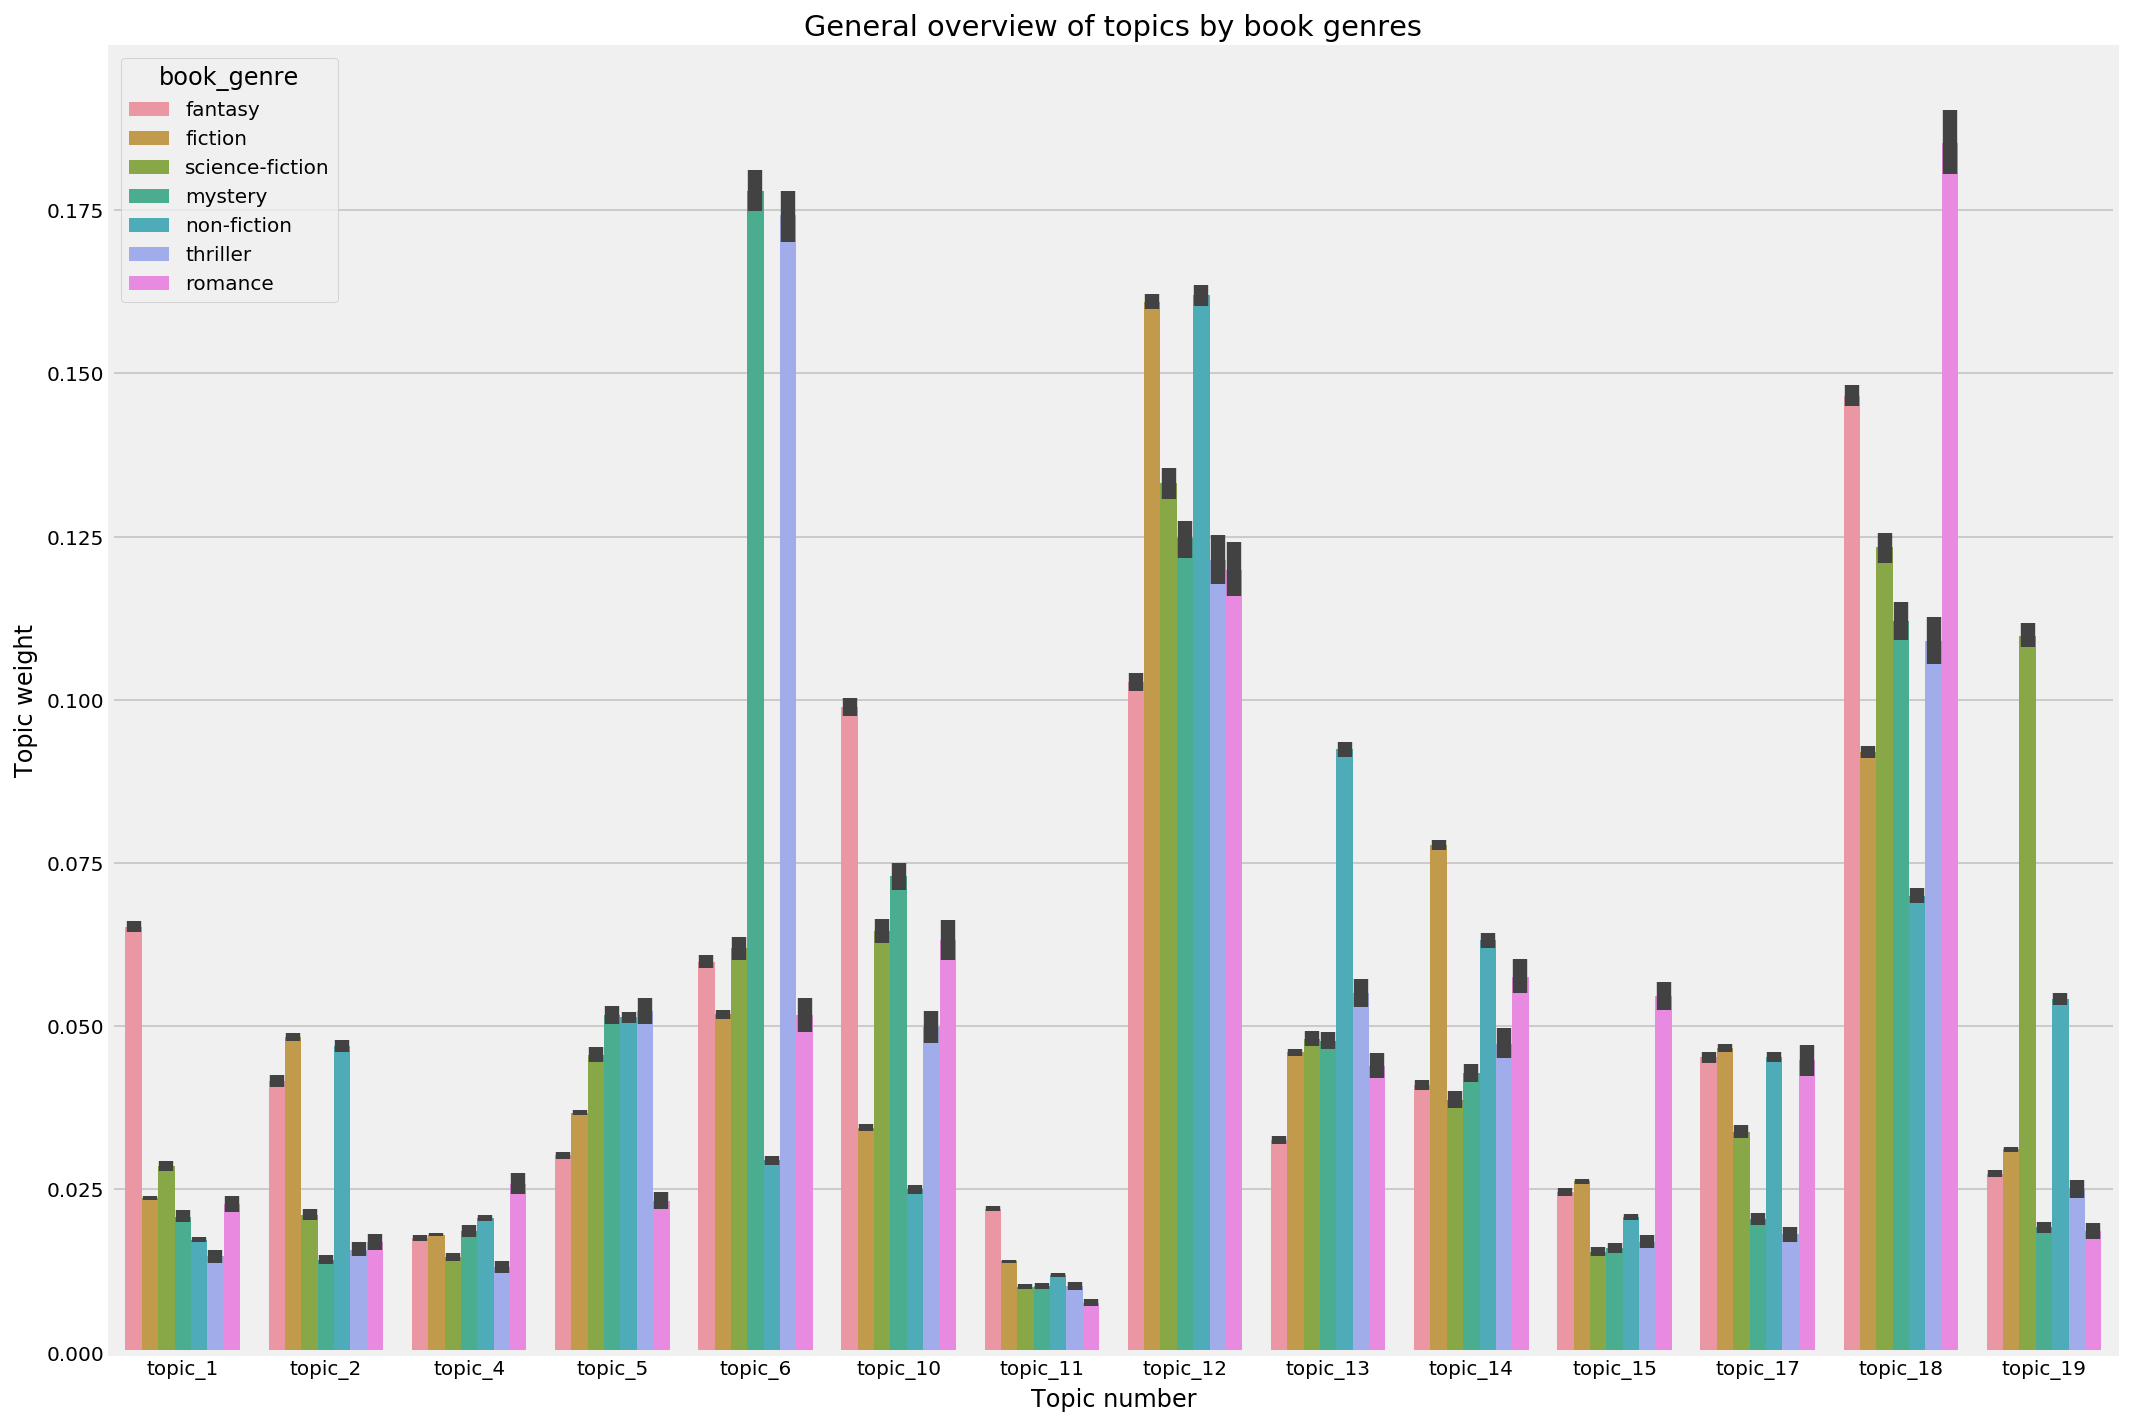

In [121]:
EXCLUDED_TOPICS = ['topic_3', 'topic_7', 'topic_8', 'topic_9', 'topic_16', 'topic_20']

fig = plt.figure(figsize=(16, 12))
ax = fig.gca()    
sns.barplot(
    x='variable',
    y="value",
    hue="book_genre",
    data=melted_topics[
        ~ melted_topics.variable.isin(EXCLUDED_TOPICS)
    ],
    ax=ax,
)
ax.set_ylabel('Topic weight')
ax.set_xlabel('Topic number')
_ = ax.set_title('General overview of topics by book genres')

<font color=navy>
    At a glance, there is quite a bit of variation in terms of topic weights for different genres. This is particularly the case for topics 6 (plot line, story), 12 (storytelling), 18 (character interactions) and 19 (philosophy, high-minded ideas). This suggests that focusing on topics with the highest weight when developing promotion materials for a given book genre would be an effective course of action, since these themes are prevalent in consumer reviews.
   </font>

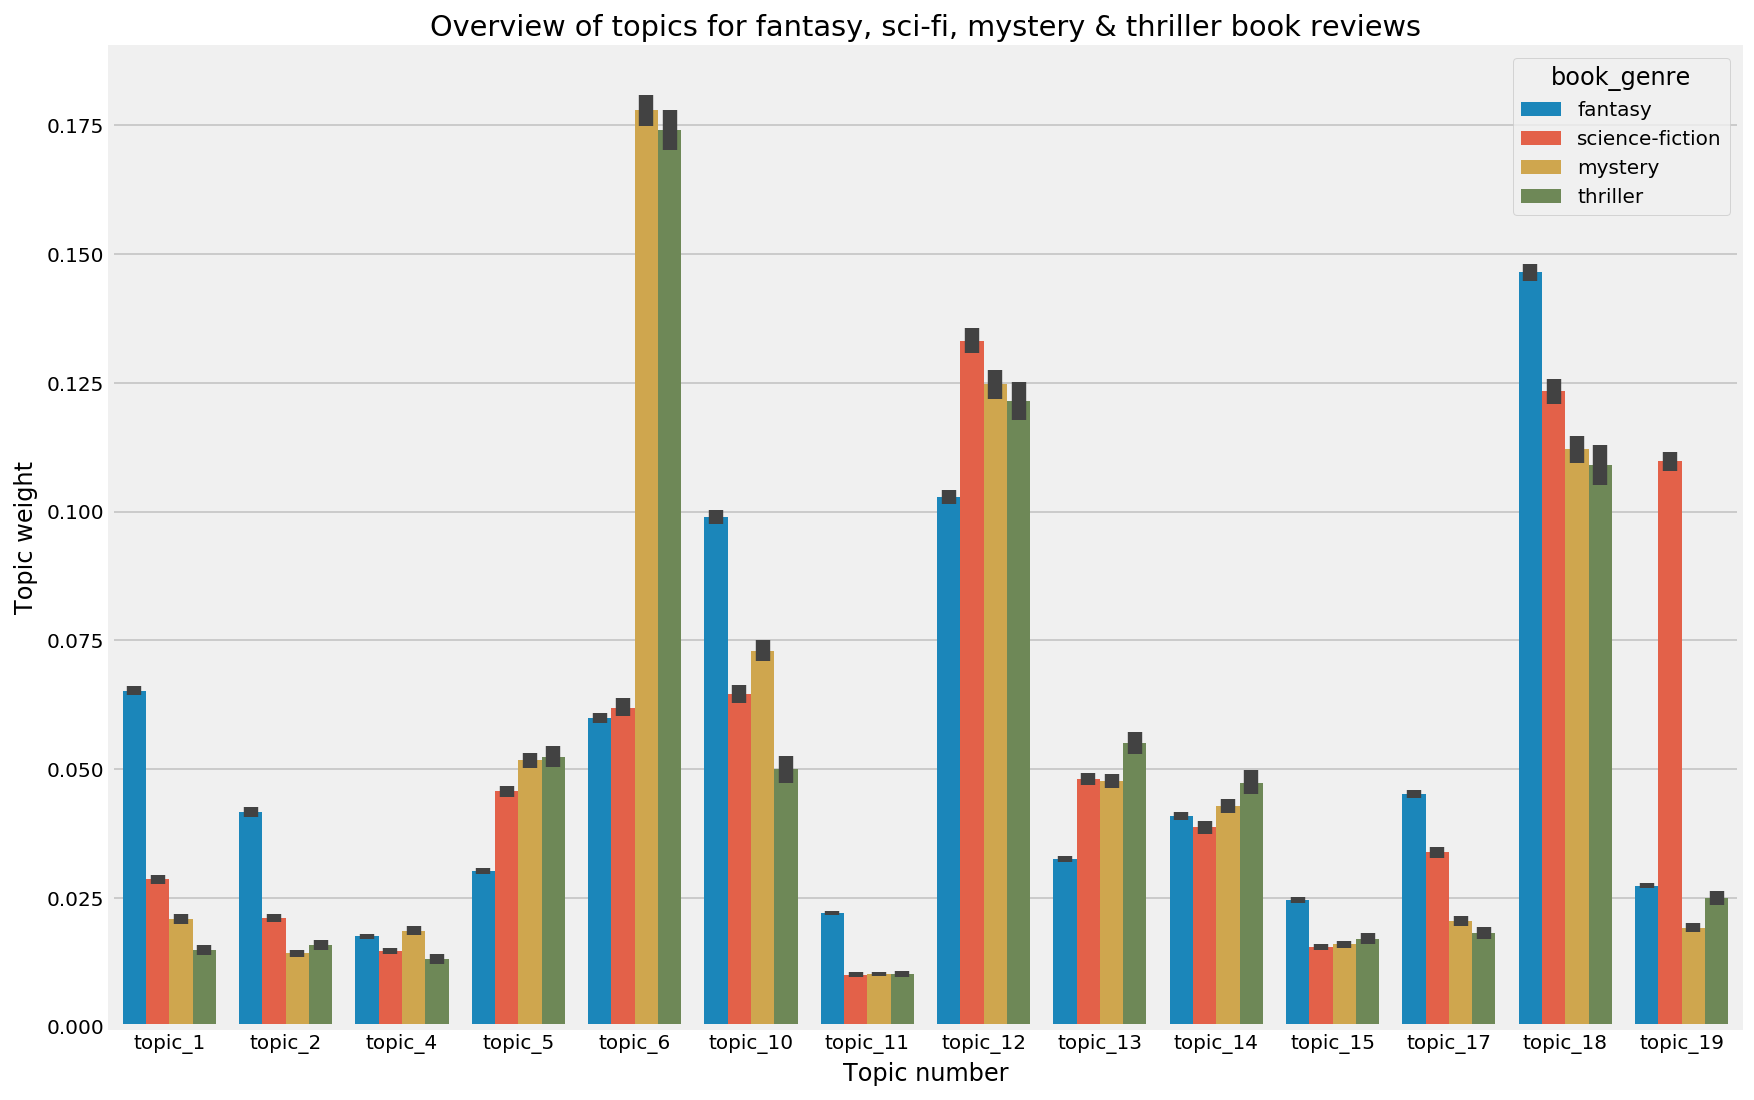

In [122]:
EXCLUDED_TOPICS = ['topic_3', 'topic_7', 'topic_8', 'topic_9', 'topic_16', 'topic_20']
INCLUDED_GENRES = ['fantasy', 'science-fiction', 'mystery', 'thriller']

fig = plt.figure(figsize=(13, 9))
ax = fig.gca()    
sns.barplot(
    x='variable',
    y="value",
    hue="book_genre",
    data=melted_topics[
        ~ melted_topics.variable.isin(EXCLUDED_TOPICS)
        & melted_topics.book_genre.isin(INCLUDED_GENRES)
    ],
    ax=ax,
)
ax.set_ylabel('Topic weight')
ax.set_xlabel('Topic number')
_ = ax.set_title('Overview of topics for fantasy, sci-fi, mystery & thriller book reviews')

<font color=navy>
    This bar plot, which focuses only on 4 fiction genres, shows that while there are common topics fiction readers care about, some clear genre-specific trends also emerge. Mystery and thriller readers care most about a book's plot line and story (topic 6). Fantasy readers care most about character interactions (topic 18), storytelling (topic 12), magic/the supernatural (topic 1) but also, interestingly, about sagas and book series (topic 10). The latter suggests that emphasising the place a book holds in a saga when promoting it can improve its visibility (e.g. "Oathbringer, book 3 of the Stormlight Archive series" instead of "Brandon Sanderson's epic fantasy novel Oathbringer"). Lastly, while science-fiction readers also care about storytelling and character interactions, it is interesting to see that topics such as philisophy/high-minded ideas (topic 19) are also prevalent and those could be incorporated in book advertisements.
    </font>

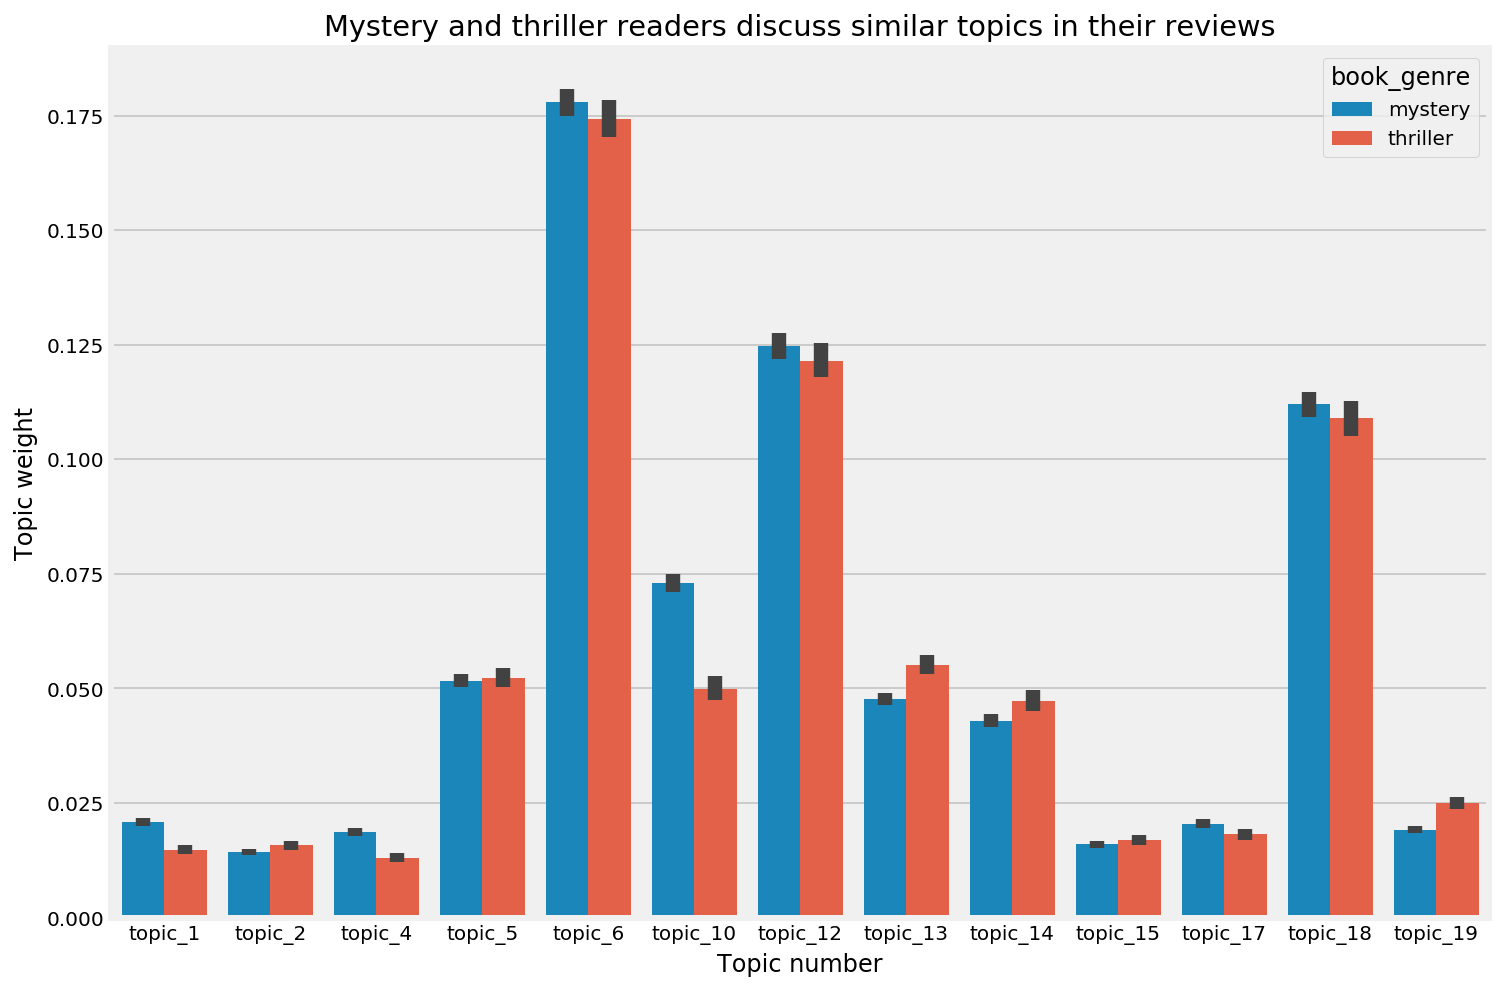

In [123]:
EXCLUDED_TOPICS = ['topic_3', 'topic_7', 'topic_8', 'topic_9', 'topic_11', 'topic_16', 'topic_20']
INCLUDED_GENRES = ['mystery', 'thriller']

fig = plt.figure(figsize=(11, 8))
ax = fig.gca()    
_ = sns.barplot(
    x='variable',
    y="value",
    hue="book_genre",
    data=melted_topics[
        ~ melted_topics.variable.isin(EXCLUDED_TOPICS)
        & melted_topics.book_genre.isin(INCLUDED_GENRES)
    ],
    ax=ax,
)
ax.set_ylabel('Topic weight')
ax.set_xlabel('Topic number')
_ = ax.set_title('Mystery and thriller readers discuss similar topics in their reviews')

<font color=navy>
    Mystery and thriller book reviews seem to have similar topics, so for simplicity I will remove the thriller genre. Readers of these genres mainly care about a book's plot line, and storytelling.
   </font>

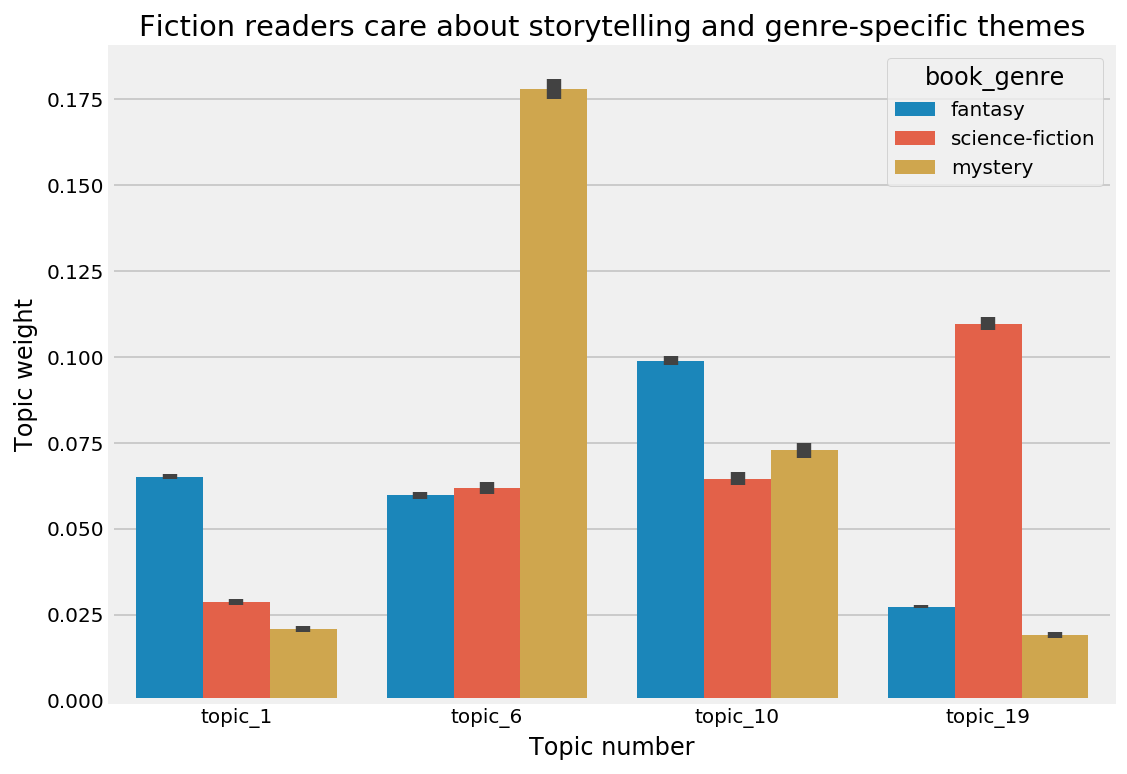

In [124]:
EXCLUDED_TOPICS = ['topic_2', 'topic_3', 'topic_4', 'topic_5', 'topic_7', 'topic_8', 'topic_9', 'topic_11', 'topic_12', 'topic_13', 'topic_14',
                   'topic_15', 'topic_16', 'topic_17', 'topic_18', 'topic_20']
INCLUDED_GENRES = ['fantasy', 'science-fiction', 'mystery']

fig = plt.figure(figsize=(8, 6))
ax = fig.gca()    
sns_plot1 = sns.barplot(
        x='variable',
        y="value",
        hue="book_genre",
        data=melted_topics[
            ~ melted_topics.variable.isin(EXCLUDED_TOPICS)
            & melted_topics.book_genre.isin(INCLUDED_GENRES)
        ],
        ax=ax,
    )
ax.set_ylabel('Topic weight')
ax.set_xlabel('Topic number')
_ = ax.set_title('Fiction readers care about storytelling and genre-specific themes')

<font color=navy>
    Fantasy readers care most about themes like magic and the supernatural, and sagas/book series. Mystery readers on the other hand mainly care about a book's plot, and science-fiction readers about philosophy/high-minded ideas. Readers of all three genres care about character interactions and storytelling (topics 12 and 18, not shown in this figure for clarity).
    </font>

In [125]:
fig.savefig("fiction_topics.eps")

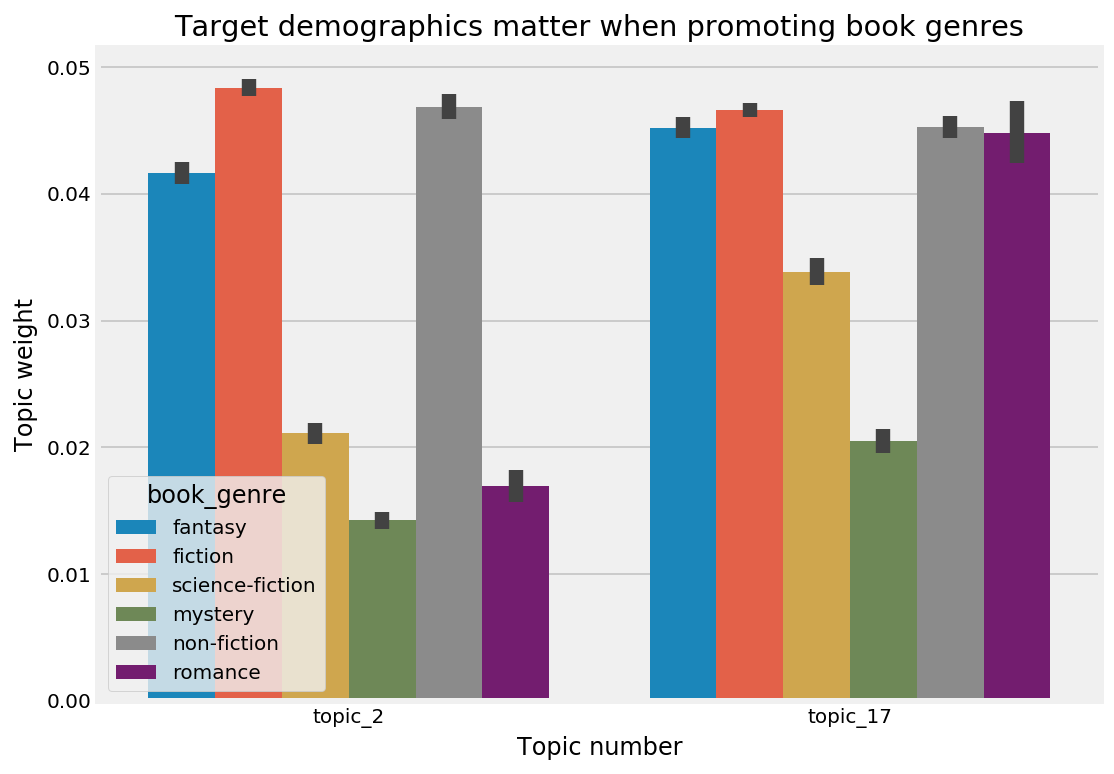

In [126]:
EXCLUDED_TOPICS = ['topic_1', 'topic_3', 'topic_4', 'topic_5', 'topic_6', 'topic_7', 'topic_8', 'topic_9', 'topic_10', 'topic_11',
                   'topic_12', 'topic_13', 'topic_14', 'topic_15', 'topic_16', 'topic_18', 'topic_19', 'topic_20']
INCLUDED_GENRES = ['fantasy', 'science-fiction', 'mystery', 'romance', 'fiction', 'non-fiction']

fig = plt.figure(figsize=(8, 6))
ax = fig.gca()    
sns.barplot(
    x='variable',
    y="value",
    hue="book_genre",
    data=melted_topics[
        ~ melted_topics.variable.isin(EXCLUDED_TOPICS)
        & melted_topics.book_genre.isin(INCLUDED_GENRES)
    ],
    ax=ax,
    )
ax.set_ylabel('Topic weight')
ax.set_xlabel('Topic number')
_ = ax.set_title('Target demographics matter when promoting book genres')

<font color=navy>
    Children's books tend to be mostly fantasy, fiction or non-fiction (e.g. educational books), while young adults read those genres as well as more romance.
    </font>

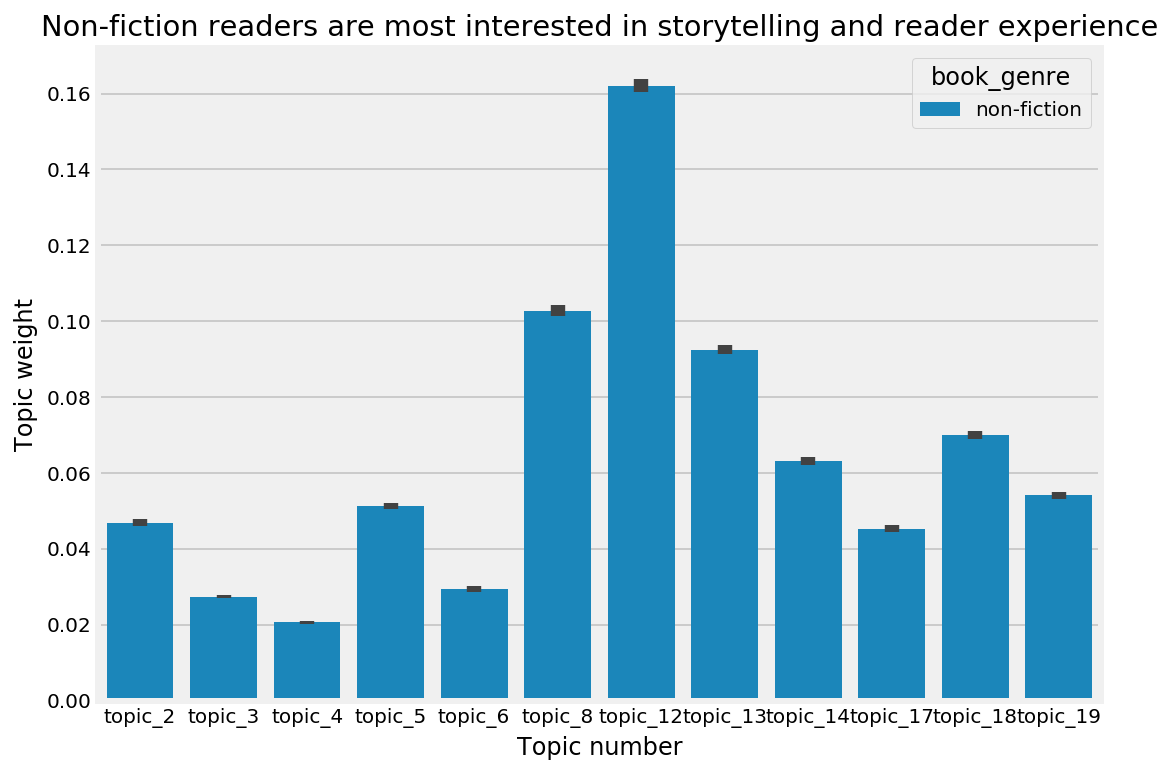

In [127]:
EXCLUDED_TOPICS = ['topic_1', 'topic_7', 'topic_9', 'topic_10','topic_11', 'topic_15', 'topic_16', 'topic_20']
INCLUDED_GENRES = ['non-fiction']

fig = plt.figure(figsize=(8, 6))
ax = fig.gca()    
sns.barplot(
    x='variable',
    y="value",
    hue="book_genre",
    data=melted_topics[
        ~ melted_topics.variable.isin(EXCLUDED_TOPICS)
        & melted_topics.book_genre.isin(INCLUDED_GENRES)
    ],
    ax=ax,
)
ax.set_ylabel('Topic weight')
ax.set_xlabel('Topic number')
_ = ax.set_title('Non-fiction readers are most interested in storytelling and reader experience')

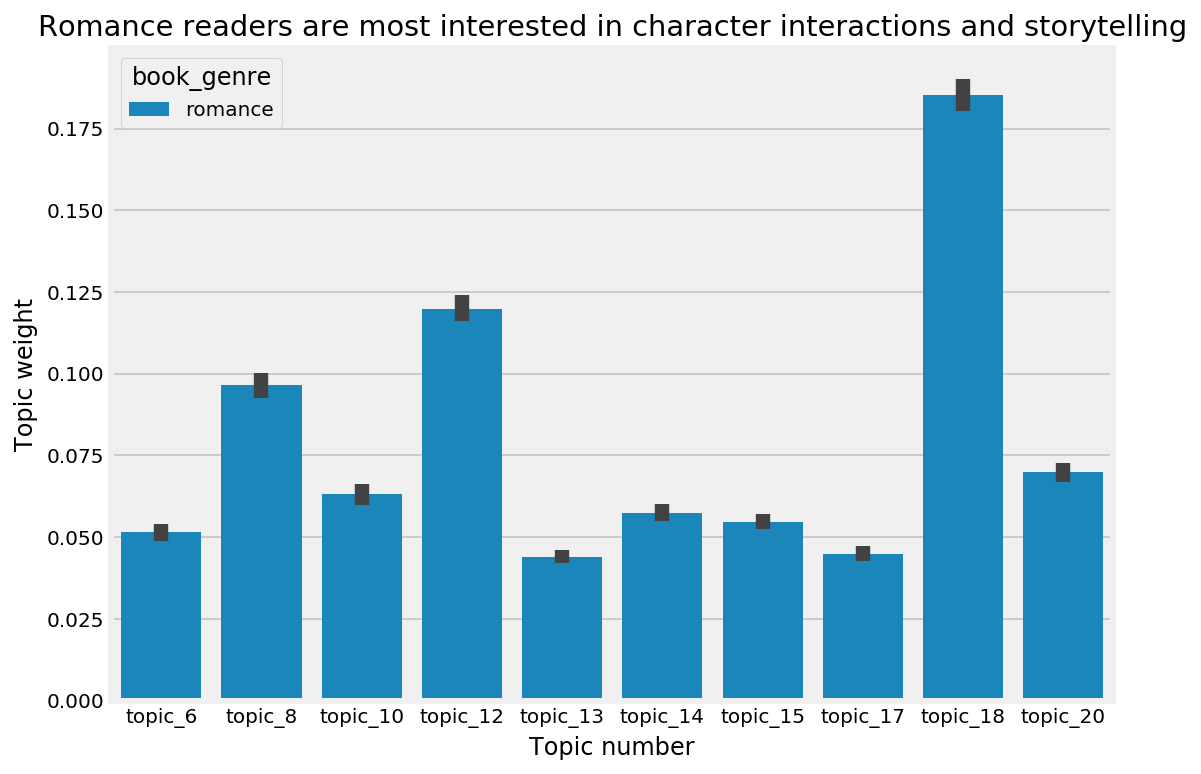

In [128]:
EXCLUDED_TOPICS = ['topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5', 'topic_7', 'topic_9', 'topic_11', 'topic_16', 'topic_19']
INCLUDED_GENRES = ['romance']

fig = plt.figure(figsize=(8, 6))
ax = fig.gca()    
sns.barplot(
    x='variable',
    y="value",
    hue="book_genre",
    data=melted_topics[
        ~ melted_topics.variable.isin(EXCLUDED_TOPICS)
        & melted_topics.book_genre.isin(INCLUDED_GENRES)
    ],
    ax=ax,
)
ax.set_ylabel('Topic weight')
ax.set_xlabel('Topic number')
_ = ax.set_title('Romance readers are most interested in character interactions and storytelling')